In [0]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Basic').getOrCreate()

from sparknlp.base import Finisher, DocumentAssembler
from sparknlp.annotator import (Tokenizer, Normalizer,
                                LemmatizerModel, StopWordsCleaner)
from pyspark.ml import Pipeline

from pyspark.ml.feature import FeatureHasher
from pyspark.ml.feature import HashingTF, IDF
from pyspark.ml.feature import CountVectorizer, HashingTF, IDF, OneHotEncoder, StringIndexer, VectorAssembler, SQLTransformer

#Importing commonly used functions that may be used going forward
from pyspark.sql.functions import col, lit, isnan, count, when

from pyspark.ml.feature import VectorAssembler, VectorIndexer, OneHotEncoder, StringIndexer

from sparknlp.base import DocumentAssembler, Finisher
from sparknlp.annotator import Tokenizer, Normalizer, StopWordsCleaner, Stemmer
from pyspark.ml import Pipeline
from pyspark.ml.feature import RegexTokenizer, CountVectorizer, StopWordsRemover, IDF, VectorAssembler, HashingTF, IDF
from pyspark.ml.tuning import CrossValidator, TrainValidationSplit, ParamGridBuilder
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from nltk.stem.snowball import SnowballStemmer
from pyspark.ml.feature import NGram
from pyspark.sql.functions import array_union
from pyspark.ml.feature import NGram
from pyspark.sql.functions import array_union

In [0]:
import numpy as np # recall that "np" etc. -- are abbreviated names we gave to these packages for notational convenience
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections


import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

from sparknlp.base import DocumentAssembler, Finisher
from sparknlp.annotator import Tokenizer, Normalizer, StopWordsCleaner, Stemmer

from pyspark.ml import Pipeline
from pyspark.ml.feature import CountVectorizer, HashingTF, IDF, StringIndexer, SQLTransformer, IndexToString, VectorAssembler
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier

from pyspark.ml import Pipeline
from pyspark.ml.feature import RegexTokenizer, StopWordsRemover
from pyspark.sql import functions as f

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

#Logistic Regression 
import mlflow
import mlflow.spark
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pandas as pd
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, TrainValidationSplit, ParamGridBuilder

In [0]:
# Load in one of the tables
df1 = spark.sql("select * from default.video_games_5")
df2 = spark.sql("select * from default.books_5_small")
df3 = spark.sql("select * from default.home_and_kitchen_5_small")
df = df1.union(df2).union(df3)
print((df.count(), len(df.columns)))

(3487331, 11)

In [0]:
messi=df.toPandas()

In [0]:
df.show()

df.describe().show()

--------------------------------------------------------------------------- 
 NameError Traceback (most recent call last)
 <command-2479582707320761> in <module> 
 ----> 1 df . show ( ) 
 2 
 3 df . describe ( ) . show ( ) 

 NameError : name 'df' is not defined

In [0]:
# The count of each overall rating

from pyspark.sql.functions import col
df.groupBy("overall").count().orderBy(col("overall").asc()).display()

overall count 1.0 179046 2.0 153010 3.0 291621 4.0 612575 5.0 2251079

In [0]:
#Lets see if there are any null values present
xavi.isnull().sum()

#Values missing in reviewer name and summary

Out[6]: reviewID 0
overall 0
verified 0
reviewTime 0
reviewerID 0
asin 0
reviewerName 259
reviewText 0
summary 410
unixReviewTime 0
label 0
dtype: int64

In [0]:
# The most common product IDs
df.groupBy("asin").count().orderBy(col("count").desc()).show(10)

+----------+-----+
 asin|count|
+----------+-----+
0007420412|19655|
000711835X|18496|
0007548672|15921|
0007350899| 7890|
0007444117| 7830|
B000YGEVMI| 7356|
0007378033| 6336|
B0015TMHSI| 5846|
006017322X| 5161|
0007384289| 5095|
+----------+-----+
only showing top 10 rows

In [0]:
#changing seed, data.
#no spell
#using translation
#Try to do simple boosting
#Cross validation 
#using translator to remove the reviews..
#picking sample
#down sampling


#Try Gradient Boosting
#Try to change the weights of zeros you take in the sample..
#Try to match the 304,000 rows 

In [0]:
df.printSchema()

root
-- reviewID: long (nullable = true)
-- overall: double (nullable = true)
-- verified: boolean (nullable = true)
-- reviewTime: string (nullable = true)
-- reviewerID: string (nullable = true)
-- asin: string (nullable = true)
-- reviewerName: string (nullable = true)
-- reviewText: string (nullable = true)
-- summary: string (nullable = true)
-- unixReviewTime: integer (nullable = true)
-- label: integer (nullable = true)

In [0]:
#Dropping NAs
df_na=df.dropna()

#Duplicates
print("Before duplication removal: ", df_na.count())
df_distinct = df_na.dropDuplicates(['reviewerID', 'asin'])
print("After duplication removal: ", df_distinct.count())

Before duplication removal: 3486662
After duplication removal: 3198550

In [0]:
#Converting the Date Column into date
#Feature Engineering
from pyspark.sql.functions import to_date, from_unixtime, to_date

df = df.withColumn('date_review', to_date(from_unixtime('unixReviewTime')))

df.show(10)

+--------+-------+--------+-----------+--------------+----------+-----------------+--------------------+--------------------+--------------+-----+-----------+
reviewID|overall|verified| reviewTime| reviewerID| asin| reviewerName| reviewText| summary|unixReviewTime|label|date_review|
+--------+-------+--------+-----------+--------------+----------+-----------------+--------------------+--------------------+--------------+-----+-----------+
 0| 5.0| true|10 17, 2015|A1HP7NVNPFMA4N|0700026657| Ambrosia075|This game is a bi...|but when you do i...| 1445040000| 0| 2015-10-17|
 1| 4.0| false|07 27, 2015|A1JGAP0185YJI6|0700026657| travis|I played it a whi...|But in spite of t...| 1437955200| 0| 2015-07-27|
 2| 3.0| true|02 23, 2015|A1YJWEXHQBWK2B|0700026657|Vincent G. Mezera| ok game.| Three Stars| 1424649600| 0| 2015-02-23|
 3| 2.0| true|02 20, 2015|A2204E1TH211HT|0700026657| Grandma KR|found the game a ...| Two Stars| 1424390400| 0| 2015-02-20|
 4| 5.0| true|12 25, 2014|A2RF5B5H74JLPE|0700026657| jon|great game, I lov...| love this game| 1419465600| 0| 2014-12-25|
 5| 4.0| true|11 13, 2014|A11V6ZJ2FVQY1D|0700026657| IBRAHIM ALBADI|i liked a lot som...| Anno 2070| 1415836800| 0| 2014-11-13|
 6| 1.0| false| 08 2, 2014|A1KXJ1ELZIU05C|0700026657| Creation27|I'm an avid gamer...|Avoid This Game -...| 1406937600| 0| 2014-08-02|
 7| 5.0| true| 03 3, 2014|A1WK5I4874S3O2|0700026657| WhiteSkull|I bought this gam...|A very good game ...| 1393804800| 0| 2014-03-03|
 8| 5.0| true|02 21, 2014| AV969NA4CBP10|0700026657| Travis B. Moore|I have played the...|Anno 2070 more li...| 1392940800| 0| 2014-02-21|
 9| 4.0| true|06 27, 2013|A1EO9BFUHTGWKZ|0700026657| johnnyz3|I liked it and ha...| Pretty fun| 1372291200| 0| 2013-06-27|
+--------+-------+--------+-----------+--------------+----------+-----------------+--------------------+--------------------+--------------+-----+-----------+
only showing top 10 rows

In [0]:
#I am grouping by the date of review to make a nice chart..
df.groupBy('date_review').count().orderBy('count', ascending=True)

Out[10]: DataFrame[date_review: date, count: bigint]

In [0]:
df.createOrReplaceTempView('final_df')

display(spark.sql('''
  SELECT date_review, COUNT(date_review)
  FROM final_df
  GROUP BY date_review
  ORDER BY date_review
'''))



date_review count(date_review) 1996-09-18 1 1996-11-20 1 1996-12-17 1 1997-03-08 1 1997-04-15 1 1997-04-17 1 1997-05-03 1 1997-05-09 1 1997-06-01 1 1997-06-05 1 1997-06-11 1 1997-06-18 1 1997-06-27 1 1997-07-19 1 1997-07-24 1 1997-08-07 1 1997-08-08 1 1997-08-09 4 1997-08-10 3 1997-08-11 4 1997-08-12 5 1997-08-13 5 1997-08-14 1 1997-08-15 1 1997-08-16 2 1997-08-20 4 1997-08-21 4 1997-08-22 3 1997-08-23 2 1997-08-24 2 1997-08-26 1 1997-08-28 2 1997-08-29 3 1997-08-30 2 1997-09-01 2 1997-09-03 1 1997-09-04 2 1997-09-05 1 1997-09-06 3 1997-09-07 1 1997-09-08 3 1997-09-09 2 1997-09-10 2 1997-09-11 1 1997-09-12 1 1997-09-15 1 1997-09-17 2 1997-09-18 1 1997-09-19 1 1997-09-20 7 1997-09-21 1 1997-09-22 7 1997-09-23 2 1997-09-24 2 1997-09-26 3 1997-09-27 3 1997-09-28 8 1997-09-30 3 1997-10-01 4 1997-10-02 3 1997-10-03 3 1997-10-04 2 1997-10-05 6 1997-10-06 9 1997-10-07 2 1997-10-08 1 1997-10-09 4 1997-10-10 1 1997-10-11 1 1997-10-12 2 1997-10-13 5 1997-10-14 1 1997-10-15 9 1997-10-17 6 1997-10-18 4 1997-10-19 1 1997-10-20 6 1997-10-21 6 1997-10-22 1 1997-10-23 8 1997-10-24 5 1997-10-25 3 1997-10-27 5 1997-10-28 3 1997-10-29 4 1997-10-30 4 1997-11-01 1 1997-11-02 2 1997-11-03 4 1997-11-04 1 1997-11-05 1 1997-11-06 3 1997-11-07 1 1997-11-08 2 1997-11-09 2 1997-11-10 4 1997-11-11 3 1997-11-12 3 1997-11-13 5 1997-11-14 2 1997-11-15 9 1997-11-16 1 1997-11-17 1 1997-11-18 1 1997-11-19 2 1997-11-20 1 1997-11-22 2 1997-11-23 2 1997-11-24 3 1997-11-25 4 1997-11-26 7 1997-11-27 2 1997-11-28 2 1997-11-29 3 1997-11-30 1 1997-12-01 4 1997-12-02 1 1997-12-03 5 1997-12-04 2 1997-12-05 8 1997-12-06 4 1997-12-07 3 1997-12-08 2 1997-12-09 2 1997-12-10 8 1997-12-12 4 1997-12-13 3 1997-12-15 3 1997-12-16 3 1997-12-17 1 1997-12-18 5 1997-12-19 3 1997-12-20 3 1997-12-21 5 1997-12-22 6 1997-12-23 1 1997-12-24 1 1997-12-25 2 1997-12-26 4 1997-12-27 1 1997-12-29 2 1997-12-30 4 1997-12-31 7 1998-01-01 4 1998-01-02 3 1998-01-03 7 1998-01-04 1 1998-01-05 1 1998-01-06 6 1998-01-08 3 1998-01-09 2 1998-01-10 3 1998-01-11 7 1998-01-12 4 1998-01-13 7 1998-01-14 3 1998-01-15 3 1998-01-16 6 1998-01-17 5 1998-01-18 9 1998-01-21 2 1998-01-22 4 1998-01-23 7 1998-01-24 3 1998-01-25 5 1998-01-26 6 1998-01-27 2 1998-01-28 2 1998-01-29 3 1998-01-30 5 1998-01-31 1 1998-02-01 2 1998-02-02 2 1998-02-03 6 1998-02-04 1 1998-02-05 1 1998-02-06 3 1998-02-07 3 1998-02-08 8 1998-02-09 2 1998-02-10 6 1998-02-11 4 1998-02-14 4 1998-02-15 3 1998-02-16 1 1998-02-17 16 1998-02-18 1 1998-02-19 3 1998-02-20 8 1998-02-21 2 1998-02-22 3 1998-02-23 5 1998-02-24 2 1998-02-25 3 1998-02-27 2 1998-02-28 6 1998-03-01 3 1998-03-02 7 1998-03-03 6 1998-03-04 4 1998-03-05 5 1998-03-06 5 1998-03-07 5 1998-03-08 5 1998-03-09 6 1998-03-10 3 1998-03-11 8 1998-03-12 3 1998-03-13 6 1998-03-15 2 1998-03-16 3 1998-03-17 8 1998-03-18 4 1998-03-19 6 1998-03-20 5 1998-03-21 1 1998-03-22 4 1998-03-23 6 1998-03-24 9 1998-03-25 8 1998-03-26 6 1998-03-27 4 1998-03-28 2 1998-03-29 8 1998-03-30 6 1998-03-31 9 1998-04-01 5 1998-04-02 8 1998-04-03 3 1998-04-05 5 1998-04-06 5 1998-04-07 7 1998-04-08 6 1998-04-09 4 1998-04-10 3 1998-04-11 1 1998-04-12 9 1998-04-13 5 1998-04-14 7 1998-04-15 4 1998-04-16 6 1998-04-17 6 1998-04-18 5 1998-04-19 5 1998-04-20 6 1998-04-21 9 1998-04-22 3 1998-04-23 5 1998-04-25 2 1998-04-26 5 1998-04-27 3 1998-04-28 8 1998-04-29 5 1998-04-30 4 1998-05-02 4 1998-05-03 4 1998-05-04 3 1998-05-05 2 1998-05-06 6 1998-05-07 4 1998-05-08 4 1998-05-09 2 1998-05-10 7 1998-05-11 8 1998-05-12 4 1998-05-13 6 1998-05-14 9 1998-05-15 5 1998-05-16 4 1998-05-17 6 1998-05-18 11 1998-05-19 4 1998-05-20 8 1998-05-21 10 1998-05-22 6 1998-05-23 2 1998-05-24 7 1998-05-25 5 1998-05-26 2 1998-05-27 4 1998-05-28 5 1998-05-29 7 1998-05-30 5 1998-05-31 4 1998-06-01 4 1998-06-02 4 1998-06-03 3 1998-06-04 3 1998-06-05 5 1998-06-06 3 1998-06-07 5 1998-06-08 6 1998-06-09 9 1998-06-10 6 1998-06-11 5 1998-06-12 3 1998-06-13 4 1998-06-14 8 1998-06-15 6 1998-06-16 4 1998-06-17 8 1998-06-18 9 1998-06-19 6 1998-06-20 7 1998-06-21 7 1

In [0]:
# Distribution of the overall ratings

df.createOrReplaceTempView('Messi')

star_rating = spark.sql('''
  SELECT 
    overall AS star_rating, 
    COUNT(*) AS count 
  FROM
    Messi
  GROUP BY
    overall
  ORDER BY
    overall
''')
display(star_rating)


star_rating count 1.0 179046 2.0 153010 3.0 291621 4.0 612575 5.0 2251079

In [0]:
#EDA
prediction_df = df.where( ((df.overall == 1) | (df.overall == 5)) \
                                             & df.verified == True )
# This is equivalent to the following Spark SQL command:

#prediction_df = spark.sql("SELECT * FROM amazon_book_reviews WHERE (overall = 1 OR overall = 5) AND verified = TRUE")

display(prediction_df)

reviewID overall verified reviewTime reviewerID asin reviewerName reviewText summary unixReviewTime label 0 5.0 true 10 17, 2015 A1HP7NVNPFMA4N 0700026657 Ambrosia075 This game is a bit hard to get the hang of, but when you do it's great. but when you do it's great. 1445040000 0 4 5.0 true 12 25, 2014 A2RF5B5H74JLPE 0700026657 jon great game, I love it and have played it since its arrived love this game 1419465600 0 7 5.0 true 03 3, 2014 A1WK5I4874S3O2 0700026657 WhiteSkull I bought this game thinking it would be pretty cool and that i might play it for a week or two and be done. Boy was I wrong! From the moment I finally got the gamed Fired up (the other commentors on this are right, it takes forever and u are forced to create an account) I watched as it booted up I could tell right off the bat that ALOT of thought went into making this game. If you have ever played Sim city, then this game is a must try as you will easily navigate thru it and its multi layers. I have been playing htis now for a month straight, and I am STILL discovering layers of complexity in the game. There are a few things in the game that could used tweaked, but all in all this is a 5 star game. A very good game balance of skill with depth of choices 1393804800 0 8 5.0 true 02 21, 2014 AV969NA4CBP10 0700026657 Travis B. Moore I have played the old anno 1701 AND 1503. this game looks great but is more complex than the previous versions of the game. I found a lot of things lacking such as the sources of power and an inability to store energy with batteries or regenertive fuel cells as buildings in the game need power. Trade is about the same. My main beef with this it requires an internet connection. Other than that it has wonderful artistry and graphics. It is the same as anno 1701 but set in a future world where global warmming as flood the land and resource scarcity has sent human kind to look to the deep ocean for valuable minerals. I recoment the deep ocean expansion or complete if you get this. I found the ai instructor a little corny but other than that the game has some real polish. I wrote my 2 cents worth on suggestions on anno 2070 wiki and you can read 3 pages on that for game ideas I had. Anno 2070 more like anno 1701 1392940800 0 12 5.0 true 08 14, 2011 AN3YYDZAS3O1Y 0700099867 Bob Loved playing Dirt 2 and I thought the graphics were good. Purchased Dirt 3 as an addition to the other...and the graphics are absolutely "Gorgeous" If you liked Dirt or Dirt 2...you are going to love Dirt 3. The game was easier to configure with my Logitech wireless rumblepad...and with my EVGA GTX 580, and all detail set to full on graphics at 1920 x 1080 I get over 100 fps. The game looks good, plays well and is a blast! A step up from Dirt 2 and that is terrific! 1313280000 1 17 1.0 true 05 18, 2013 A1NQ759X8WPIVV 0700026398 Lynn I'm sure I would love the game, if I could play it, I have loved all the Hitman games thus far. The one star is due to steam. Steam is absolutely beyond annoying and they do NOT help you if you ask them. I found out after I purchased it that windows xp does not support direct X-10. I do have a high end video card but it doesn't make a difference. I recommend that no one purchase any games or other items that require steam. Perhaps then they will fix all the problems or go out of business (my favorite option). I am very good with computers (built mine) so that is not the problem. As always it's a steam issue. Requires steam 1368835200 0 20 5.0 true 04 6, 2015 A2LVV3GA8LN557 0700099867 Mike A. Darsch i like bf games and this works with my wireless xbox 360 controller ( i don't have a xbox i use it for pc games) i like bf games and this works with my wireless xbox ... 1428278400 0 25 1.0 true 06 30, 2014 A248LSBZT4P38V 0700099867 Joseph R. Kennedy I bought this and the key didn't work. It was a gift, and the recipient wasn't able to solve the problem. It might have been a good game, but I never found out because the key failed. It might h

In [0]:
#asin (Amazon Standard Identification Number, similar to a SKU) refers to each unique prod
#Lets find the count of the unique products we are dealing with in our data

#We can see that there are 65.5k unique asins
df.select(col('asin')).distinct().count()

Out[15]: 65504

In [0]:
#What percentage of our reviews are verified?
from pyspark.sql.functions import round

display(df.groupBy('verified').count())

#Printing out the value as a percentage
#Can see that 80+% of reviews are verified
percentage_true = df.filter((col('verified') == 'true')).count() / df.count()

print(f'{percentage_true}% of reviews are verified')

verified count true 2831667 false 655664

0.811986874776154% of reviews are verified

In [0]:
#Of those reviews that are verified, what do the overall ratings look like? Let's also compare to non verified reviews
import pyspark.sql.functions as f #this seems to be the standard - just call f. to view all available functions
from pyspark.sql.window import Window

verified_overall = df.filter((col('verified') == 'true')).groupBy('overall').count().orderBy('count', ascending=False)

verified_overall = verified_overall.withColumn('Percentage', f.col('count')/f.sum('count').over(Window.partitionBy())).show()

#1.9 of 2.8 million (67.7%) are verified reviews are 5 star

+-------+-------+-------------------+
overall| count| Percentage|
+-------+-------+-------------------+
 5.0|1916529| 0.6768200498151795|
 4.0| 465878|0.16452428904952454|
 3.0| 216707|0.07652983207418104|
 1.0| 124171|0.04385084828124211|
 2.0| 108382|0.03827498077987278|
+-------+-------+-------------------+

In [0]:
#Now lets look at the relationship between our target (label) and overall ratings
#What does the total split look like between helpful (1) and not helpful(0)

#We can see that only ~18% of reviews are considered to be helpful; this is surprising, as I figured it would be much higher
display(df.groupBy('label').count())

helpful = 1-df.filter((col('label') == 0)).count() / df.count()
print(f'{helpful}% of reviews are considered to be helpful')    

label count 1 626166 0 2861165

0.17955450744423174% of reviews are considered to be helpful

In [0]:
#The data is definitely imbalanced
 
display(df_distinct.groupBy('label').count())

label count 1 580477 0 2618697

In [0]:
#Dropping features that are not required..
drop_list = ['reviewID', 'reviewerID','reviewTime', 'image', 'reviewerName','summary','asin','date_review','overall','unixReviewTime','verified']
df = df_distinct.select([column for column in df_distinct.columns if column not in drop_list])
df.show(5)
print((df.count(), len(df.columns)))

+--------------------+-----+
 reviewText|label|
+--------------------+-----+
 Very real| 0|
 superb| 0|
great product use...| 0|
Love these candle...| 0|
This book was fan...| 0|
+--------------------+-----+
only showing top 5 rows

(3198550, 2)

In [0]:
#Dropping NA vals
#Count remained the same; no missing vals to report on

df.na.drop(subset=['reviewText', 'label']).show(10)

print(df.count())

+----------+--------------------+-----+
 asin| reviewText|label|
+----------+--------------------+-----+
B002MF3CZG| Very real| 0|
B001ASRFCC| superb| 0|
B000H0ZDD2|great product use...| 0|
B001EAVZ9A|Love these candle...| 0|
B00002STYY|Very satisfied cu...| 0|
B0086V5TVU|great product to ...| 0|
B00YQ2KCWO|This game is fant...| 0|
B000LNQF82|oh my goodness I ...| 0|
B003N5ZYOG|bad very bad the ...| 0|
0007466714|Loved this series...| 0|
+----------+--------------------+-----+
only showing top 10 rows

3198550

In [0]:
#Only taking reviewText feature

df = df.select('reviewText', 'label')

df.show(10)

In [0]:
# set seed for reproducibility
(trainingData, testingData) = df.randomSplit([0.8, 0.2], seed = 67)
print("Training Dataset Count: " + str(trainingData.count()))
print("Test Dataset Count: " + str(testingData.count()))

Training Dataset Count: 2557972
Test Dataset Count: 640578

In [0]:
#Now, lets scale this down to 10% of our total data to train our algorithms
#Take a stratified sample 
#Can try to take more %age of 1s to reduce imbalance?

training_sample = trainingData.sampleBy('label', fractions={0:0.1, 1:0.4}, seed=124)

display(training_sample.groupBy('label').count())

label count 1 185610 0 209674

In [0]:
training_sample.show()

+--------------------+-----+
 reviewText|label|
+--------------------+-----+
 English is avail...| 1|
!!EDIT #3!! This ...| 1|
"..ushem ushem.."...| 1|
"A Feast for Crow...| 0|
"A Proper Marriag...| 1|
"A Shell" describ...| 1|
"A Test of Wills"...| 0|
"A practical hand...| 1|
"Among the lands ...| 0|
"Born in the twen...| 1|
"Bottom up" persp...| 0|
"Call Me Ishmael"...| 1|
"Call me Ishmael....| 1|
"Castle in the Ai...| 1|
"Charlie and the ...| 1|
"Citizen Vince" i...| 1|
"Compatible with ...| 1|
"Confessions of a...| 1|
"Cool Touch" is n...| 0|
"Coraline" caught...| 0|
+--------------------+-----+
only showing top 20 rows

In [0]:
documentAssembler = DocumentAssembler() \
    .setInputCol("reviewText") \
    .setOutputCol("document")

languageDetector = LanguageDetectorDL.pretrained() \
    .setInputCols("document") \
    .setOutputCol("language")

translator = Pipeline() \
    .setStages([
      documentAssembler,
      languageDetector
    ])

ld_wiki_tatoeba_cnn_21 download started this may take some time.
Approximate size to download 7.1 MB
[ | ][OK!]

In [0]:
result = translator.fit(training_sample).transform(training_sample)

result.select("language.result").show(truncate=False)

+------+
result|
+------+
[en] |
[en] |
[en] |
[en] |
[en] |
[en] |
[en] |
[en] |
[en] |
[en] |
[en] |
[en] |
[en] |
[en] |
[en] |
[en] |
[en] |
[en] |
[en] |
[en] |
+------+
only showing top 20 rows

In [0]:
display(result)

reviewText label document language English is available. Can play any region games. Lime green is beautiful :-) 1 List(List(document, 0, 78, English is available. Can play any region games. Lime green is beautiful :-), Map(sentence -> 0), List())) List(List(language, 0, 78, en, Map(fr -> 6.5445565E-26, lv -> 0.0, pt -> 1.5437311E-26, cs -> 3.4043695E-22, el -> 1.7667086E-38, it -> 1.7604376E-24, nl -> 7.0674465E-12, bg -> 0.0, et -> 1.0932716E-18, de -> 2.2994252E-18, sv -> 3.2243573E-24, da -> 3.635468E-21, en -> 1.0, sk -> 8.778167E-23, es -> 5.8902074E-25, fi -> 2.301975E-29, ro -> 5.240321E-24, lt -> 1.2829528E-23, sl -> 8.962431E-10, sentence -> 0, hu -> 6.829755E-20, pl -> 3.5767615E-19), List())) !!EDIT #3!! This is now a NEGATIVE 5 star review! I thought that, "Hey... It's been over half a year since I last played this game... Maybe, just maybe... Blizzard fixed the stupid Skirmish A.I. and the game might be fun now..." Boy was I wrong, as I cannot even play the game anymore because of blizzard treating its paying customers as if they were criminals. They might as well ask for a fingerprint and D.N.A. sample before being able to play. Maybe I need to take a test of some sort before they deem me worthy to play a game I PHYSICALLY OWN! Hell the C.I.A. and F.B.I. websites have less log-in requirements than this freaking game. I have to REMOVE ALL STARS because this game is no longer playable due to the sheer amount of loops needed to jump through just to play OFFLINE SINGLE-PLAYER!!! There is nothing wrong with my FIOS fiber-optic connection! There is nothing wrong with my firewall! There is no reason to have to activate a game (for the sixth time!!) I LEGALLY OWN AND HAVE A PHYSICAL COPY OF IN THE DRIVE! It tells me I need to link my game to the battle.net account but doesn't give me a link or any decent information as to HOW TO DO THIS! I CANNOT PLAY THE GAME AT ALL IN ANY MODE!! I cannot even log onto the game as a GUEST on my own computer! I DON'T EVEN PLAY MULTI-PLAYER!! Why the bleep do I need to log onto 3 different places to play OFFLINE SINGLE-PLAYER!?!? This is beyond ridiculous! If this is their idea to try and stop piracy, then they failed, because this kind of treatment of PAYING CUSTOMERS just drives PC piracy through the roof. If there is any class action lawsuit against blizzard, or way to return the game, please let me know because I want my $60+ dollars back!!! !!EDIT #3!! I just got the retail release... Been waiting 10 years for this... I have to say it is more hype than it delivers on. Yes the controls are still nice and simple, I enjoy that a lot... But it just seems to be Starcraft 1 minus the brood war expansion, with a bit better graphics thrown in. Forgive me for being blunt and critical with this but THEY HAVE HAD OVER 10 YEARS TO MAKE THIS GAME!!! First off the price was outrageous, but like an idiot fanboy I shelled out $60 bucks for 1/3rd of a game... Considering that this is only the Terran campaign and that the Protoss and Zerg campaigns will not come out for over a year from now, and they will cost an additional $60 each, as far as I know at the moment! Though there are rumors they may be expansion priced at $20 a pop (in all honesty they should be FREE Down-Loadable-Content since it should have been in the game from the beginning!). So Blizzard is becoming even more greedy than EA. Sure when EA releases a game it's too soon, half-a$$ and buggy as all hell, but at least it is mostly there. Blizzard, on the other hand releases a game, a million years after the first game, fully polished and de-bugged, but missing 2/3rds of the gameplay and no big improvements over the original! The game runs fine on ultra settings for me with vista ultimate x64, 8gigs of ram, and an Nvidia 9800gtx+ card, but I am a bit disappointed considering there has been over 10 YEARS of 3D RTS advancement from the original Starcraft... What I mean is: You CANNOT rotate the camera, only zoom in and out a little bit so s

In [0]:
result.filter(result.language !=en).show(truncate=False)

--------------------------------------------------------------------------- 
 NameError Traceback (most recent call last)
 <command-2401525696848072> in <module> 
 ----> 1 result . filter ( result . language != en ) . show ( truncate = False ) 

 NameError : name 'en' is not defined

In [0]:
training_sample.na.drop(subset=['reviewText', 'label']).show(10)

print(training_sample.count())

+--------------------+-----+
 reviewText|label|
+--------------------+-----+
 English is avail...| 1|
 Fuzzy Wuzzy's Su...| 1|
"'Kids will liste...| 1|
"..ushem ushem.."...| 1|
"A Feast for Crow...| 0|
"All the world's ...| 1|
"At sixteen, Alar...| 1|
"Baseball America...| 1|
"Born in the twen...| 1|
"Brown Bear, Brow...| 0|
+--------------------+-----+
only showing top 10 rows

441548

In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import RegexTokenizer, StopWordsRemover
from pyspark.sql import functions as f

import sparknlp
from sparknlp.base import *
from sparknlp.annotator import *
from pyspark.ml import Pipeline

In [0]:
counts = trainingData.select(f.explode('filtered').alias('col')).groupBy('col').count().sort(f.desc('count')).collect()
display(counts)

col count book 958195 one 922557 game 769153 great 717006 like 709649 good 583828 read 515726 well 513547 time 458672 get 440977 love 434998 really 417862 use 412685 much 391175 story 389391 also 331907 first 326371 even 316549 little 288181 easy 261623 way 255793 make 246971 many 242273 ve 239736 still 239684 m 234887 new 234319 made 223448 works 222939 nice 220580 better 219195 two 217390 characters 216180 bought 204825 books 203876 work 202987 product 202960 best 200086 used 199792 2 198339 years 196824 back 196477 think 195934 games 192670 put 191355 people 190919 reading 181275 life 180435 know 179470 see 176998 lot 176914 find 176771 want 175073 never 173092 got 170860 series 169678 fun 169455 play 169449 go 169240 perfect 168399 recommend 167618 buy 166198 re 165003 long 163353 price 162139 didn 161007 another 159367 old 158081 every 156982 3 154799 makes 154332 quality 154149 enough 152807 bit 150951 right 150010 need 149693 things 149214 though 147749 set 145383 say 144489 thing 144026 doesn 141466 small 139990 world 139941 look 139416 found 138208 end 137809 since 136078 something 135773 keep 135369 different 134719 around 133291 going 132965 pretty 131766 5 131407 times 130300 however 129514 hard 129169 without 128945 take 128819 using 125862 last 125272 ever 124793 far 123835 always 123611 feel 123244 ll 122766 looking 122086 character 120272 water 119834 4 118654 1 116319 thought 116214 author 115220 coffee 113250 sure 112532 looks 110978 year 110949 novel 110885 clean 110616 size 110187 top 109994 day 108731 loved 107809 may 107599 big 107239 give 105789 worth 104273 come 104207 quite 103431 actually 103146 bad 101849 part 101849 interesting 101847 d 100236 seems 99808 us 99551 written 98982 excellent 98573 real 97519 must 95163 everything 95067 next 92936 came 91032 yet 90356 place 89574 job 88791 happy 88781 almost 88275 fit 87964 fan 87842 away 87120 wanted 86898 getting 86309 side 86307 family 85764 high 85698 highly 84956 problem 83311 together 83214 easily 82447 purchased 81978 less 81964 enjoyed 81902 anything 81267 might 80668 several 80404 second 79923 definitely 79811 money 79752 nothing 79426 done 79387 three 79143 pan 78989 room 78762 isn 78745 writing 78653 able 78340 probably 77781 amazon 77657 graphics 77616 playing 76525 point 76473 comes 76403 try 76204 plastic 76173 enjoy 75969 making 75861 said 75711 fine 75636 reviews 75493 others 75447 kitchen 74629 man 74533 light 74295 anyone 73954 10 73221 stars 72928 won 72811 large 72728 fact 72361 especially 72344 hold 72134 overall 71805 beautiful 71635 hand 71535 takes 70880 needed 70827 plot 70628 purchase 70517 home 69527 wonderful 69329 review 69298 gets 69191 whole 68594 war 68435 favorite 68208 help 67226 start 67162 history 66945 sturdy 66737 fast 66647 played 66612 full 66524 hot 66513 amazing 66400 let 65709 food 65576 wish 65515 least 65365 although 65340 heavy 65208 took 64417 short 64100 original 64078 rather 64035 left 64017 hours 63940 item 63712 level 63705 instead 63666 version 63431 kind 63355 reader 62506 person 62288 system 61830 gift 61379 stories 61336 liked 61186 trying 60827 etc 60269 seem 59818 perfectly 59451 bottom 59366 awesome 59068 order 58892 main 58880 maybe 58748 style 58638 simple 58318 space 58303 true 58289 wasn 58032 handle 57954 already 57938 ago 57927 experience 57853 months 57831 often 57630 ones 57164 exactly 57097 half 57029 link 56933 box 56596 couple 56595 expected 56531 couldn 56511 days 55892 either 55866 worked 55424 knife 55380 kids 55342 color 55237 case 55013 along 54777 children 54675 quickly 54536 sometimes 54468 difficult 54425 finally 54250 tried 54193 turn 54159 felt 54079 cup 54025 everyone 53981 machine 53911 line 53442 house 53251 super 53198 unit 53111 open 52853 reason 52587 someone 52382 course 52188 friends 51945 star 51788 started 51682 believe 51663 problems 51653 cover 51647 young 51512 lid 51369 mind 51243 6 51241 design 51176 action 51151 class 51085 loves 50792 past 50373 son 50158 went

In [0]:
def pos_tag(x):
    import nltk
    return nltk.pos_tag([x])pos_word = filtered_data.map(pos_tag)
print pos_word.collect()

In [0]:
display(tokens.groupBy('words').count())

words count List(with, wings, like, eagles, provides, the, reader, with, a, birds, eye, view, of, the, trends, which, culminated, in, the, battle, of, britain, tracing, the, development, of, the, raf, and, luftwaffe, in, the, 1930s, the, story, progresses, seamlessly, through, the, competing, demands, on, fighter, command, presented, by, the, battle, of, france, and, the, need, to, maintain, sufficient, strength, to, defend, britain, from, the, onslaught, to, come, the, tug, of, war, between, bomber, and, fighter, supporters, shaped, the, air, forces, of, their, day, and, altered, the, outcome, of, the, war, design, details, of, the, aircraft, make, for, interesting, reading, the, battle, of, britain, itself, is, presented, as, a, mighty, struggle, of, men, and, machines, which, changed, the, world, raf, pilots, are, depicted, as, the, brave, few, who, were, often, thrown, into, combat, with, minimal, training, and, from, which, they, would, have, little, rest, on, the, outcome, of, the, battle, rode, operation, sea, lion, the, german, invasion, of, britain, the, luftwaffe, s, failure, to, achieve, air, superiority, compelled, the, delay, and, ultimate, cancellation, of, sea, lion, the, explanation, of, the, role, the, british, defense, played, in, deflecting, the, german, offensive, from, england, to, russia, shows, the, crucial, role, of, the, battle, not, only, to, britain, but, to, the, world, even, a, mistake, may, have, turned, the, battle, just, when, the, luftwaffe, seemed, to, be, on, the, verge, of, destroying, fighter, command, a, wayward, bomb, attack, on, london, was, followed, by, a, retaliation, raid, on, berlin, this, deflection, of, resources, toward, cities, and, away, from, air, bases, may, have, saved, the, raf, to, fight, another, day, author, michael, korda, includes, interesting, studies, of, the, characters, heroic, and, maligned, who, played, major, roles, in, this, drama, i, was, particularly, struck, by, the, study, of, churchill, who, had, to, be, restrained, by, other, politicians, when, he, wanted, to, commit, the, heart, of, fighter, command, to, the, failing, defense, of, france, even, he, had, his, moments, of, delusion, goering, is, depicted, as, the, disappointed, blusterer, who, failed, to, deliver, on, his, promise, to, destroy, fighter, command, and, provide, the, cover, for, sea, lion, a, little, known, figure, sir, hugh, dowding, is, shown, as, skillfully, guiding, the, defense, while, his, retirement, age, was, gradually, deferred, until, after, victory, was, assured, even, stanley, baldwin, and, neville, chamberlin, who, are, usually, derided, as, appeasers, are, recognized, for, their, roles, in, laying, the, groundwork, for, the, development, of, the, raf, which, is, the, collective, hero, of, the, story, perhaps, the, most, humorous, story, is, one, that, dealt, with, radar, much, of, british, success, depended, on, its, development, during, the, battle, aircraft, mounted, radar, was, developed, which, gave, the, british, an, advantage, in, finding, the, enemy, during, night, attacks, not, wanting, to, disclose, the, source, of, their, new, found, success, the, story, was, leaked, that, the, pilots, were, improving, their, night, vision, by, eating, raw, carrots, the, next, time, you, think, of, eating, carrots, for, good, eye, health, remember, that, the, theory, is, grounded, not, in, scientific, research, but, in, counter, intelligence, with, wings, like, eagles, is, an, informative, narration, of, one, of, the, most, significant, forces, and, battles, of, world, war, ii, as, such, it, is, a, valuable, addition, to, any, world, war, ii, library) 1 List(i, never, dreamed, that, a, tv, game, could, be, so, much, fun, or, that, i, would, want, to, have, one, to, play, i, wish, my, dad, had, lived, long, enough, to, find, that, he, could, still, bowl, even, thought, he, couldn, t, walk, any, longer, i, m, trying, to, get, my, mom, one, there, are, so, many, sports, games, which, excl

In [0]:
import spacy
from textblob import TextBlob
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math

In [0]:
#Converting training sample to Pandas..

xavi=training_sample.toPandas()

In [0]:
for index,text in enumerate(xavi['reviewText'][35:40]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 this book is written in short digestible bites and offers one of the best overview answers i have read to everyone is perennial question what are the odds early chapters are a primer on casino games in less than an hour you can read up on how the major casino games are played how to calculate your odds of winning in many common situations and how much you will lose on every play on average if you play for any length of time rosenthal emphasizes this last proviso he shows how every casino game is stacked against the players and will whittle away your stake to nothing in the long run but some games offer better odds and will deplete you less rapidly than other games then rosenthal moves on to tell you how to win at the game of life or more precisely how not to be caught up in the frequent illogic and hysteria that is generated by headline news and tv shows he gives a better perspective on what kinds of dangers you are likely to actually face and they are not terrorists or sars or street crime a few more mathematically challenging topics are addressed such as the monty hall dilemma and how trends are spotted using linear regression lines rosenthal makes the calculation of pvalues used to determine how often a result will happen just by chance almost comprehensible some of his suggestions about using utility theory when we have to reach a decision may be of questionable value probably many of us have tried to make decisions rationally by using some formula that involves assigning some levelofdesirability number to each of our options then considering how likely it is that the benefits of that option will actually materialize but such calculations usually break down almost immediately in the maze of diverging possibilities we have to consider however one of rosenthal is applications of utility theory stands up and has implications for public policy he shows how statistics lead to the conclusion that it is unreasonably costly to insure oneself against anything except utter catastrophes this section of his book is something everyone should consider when buying insurance especially health insurance and it is something our elected officials in particular should inform themselves about before proposing any health care legislation rosenthal provides other valuable insights that might shield us and reassure us when facing health care issues for example he demonstrates how statistically unlikely it is that you have a certain disease if just one test for that disease comes back positive for further statistical discussions of this counterintuitive fact i recommend any of marilyn vos savant is books struck by lightning provides ample insight on its own though it is entertaining and it contains information you are very likely to use in everyday life
Review 2:
 classic
Review 3:
 gerald durrell writes comedy like no other i thoroughly enjoyed all the stories of his family in this book just like the others the only odd thing was the macabre story at the end which was very well written this is written well after they left the island so the family is all grown up and living on their own but some of the stories are about their family and a trip they have taken together so much comedy in the greek ship trip alone larry is humor is usually what has me laughing loudly who does not love his sarcastic wit i love reading about his entire family as they are all such different characters and funny in their own way
Review 4:
 the book explains thoroughly the tragedy of the greek civil war in the is through the experiences of eleni and her family of five children it makes you realize just how very dangerous manipulative depraved and lifethreatening communism is for any country what was done to greece was horrifying
Review 5:
 havent had a chance to read the entire book yet but so far seems to be a handy reference by a well respected author it seems to me there is something for everyone to contemplate whether a major metropolitan city apartment dwe

In [0]:
from textblob import TextBlob
xavi['polarity']=xavi['reviewText'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [0]:
! pip install plotly

Requirement already satisfied: plotly in /databricks/conda/envs/databricks-ml/lib/python3.8/site-packages (4.14.3)
Requirement already satisfied: retrying>=1.3.3 in /databricks/conda/envs/databricks-ml/lib/python3.8/site-packages (from plotly) (1.3.3)
Requirement already satisfied: six in /databricks/conda/envs/databricks-ml/lib/python3.8/site-packages (from plotly) (1.15.0)

In [0]:
sentiment_df = xavi["polarity"]

sentiment_df.head()

Out[25]: 0 0.310000
1 -0.032209
2 -0.150000
3 0.076936
4 0.238156
Name: polarity, dtype: float64

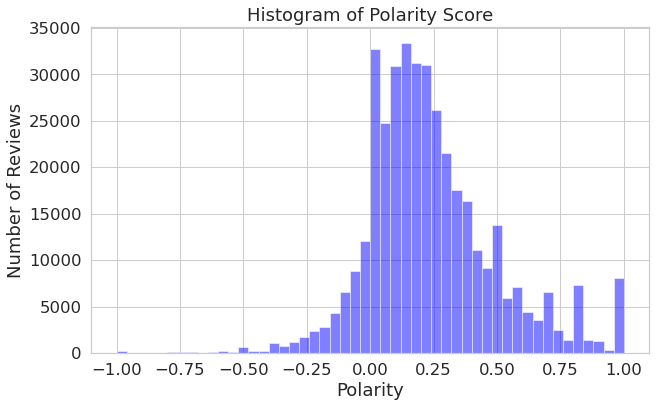

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(sentiment_df, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Polarity Score')
plt.show();

In [0]:
df.loc[(sentiment_df.polarity == 1 & (sentiment_df.Good_reviews == 0))].Text.head(10).tolist()

--------------------------------------------------------------------------- 
 AttributeError Traceback (most recent call last)
 <command-709722948191245> in <module> 
 ----> 1 df . loc [ ( sentiment_df . polarity == 1 & ( sentiment_df . Good_reviews == 0 ) ) ] . Text . head ( 10 ) . tolist ( ) 

 /databricks/spark/python/pyspark/sql/dataframe.py in __getattr__ (self, name) 
 1664 """
 1665 if name not in self . columns : 
 -> 1666 raise AttributeError(
 1667 "'%s' object has no attribute '%s'" % (self.__class__.__name__, name))
 1668 jc = self . _jdf . apply ( name ) 

 AttributeError : 'DataFrame' object has no attribute 'loc'

In [0]:
from textblob import TextBlob
xavi['polarity']=xavi['reviewText'].apply(lambda x:TextBlob(x).sentiment.polarity)

#Positive & negative Reviews
print("3 Random Reviews with Highest Polarity:")
for index,review in enumerate(xavi.iloc[xavi['polarity'].sort_values(ascending=False)[:3].index]['reviewText']):
  print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Highest Polarity:
Review 1:
 awesome
Review 2:
 this angel came perfectly packaged and i now have two angels to look over my nativity scene i am continually impressed by the quality of willow tree products and i will continue to add to my collection
Review 3:
 simply perfect for my inch skillet tfal which did not come with a lid i have found that the lid has already discolored some but it is not any problem

In [0]:
print("3 Random Reviews with Lowest Polarity:")
for index,review in enumerate(xavi.iloc[xavi['polarity'].sort_values(ascending=True)[:3].index]['reviewText']):
  print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Lowest Polarity:
Review 1:
 awful worst firestarter ever dont buy these
Review 2:
 terrible died about years after purchase avoid
Review 3:
 horrible lasted a week the one at bed bath and beyond lasted years this one is junk

In [0]:
import re
import nltk
nltk.download('stopwords')

# download stopwords list from nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    # converting to lowercase
    newString = text.lower()
    # removing links
    newString = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', newString) 
    # fetching alphabetic characters
    newString = re.sub("[^a-zA-Z]", " ", newString)
    # removing stop words
    tokens = [w for w in newString.split() if not w in stop_words]
    # removing short words
    long_words=[]
    for i in tokens:
        if len(i)>=4:                                                 
            long_words.append(i)   
    return (" ".join(long_words)).strip()

In [0]:
#Downloading & Initializing the Unviversal Sentence Encoder + Importing relevant libraries
import sparknlp
from sparknlp.annotator import *
from sparknlp.common import *
from sparknlp.base import *
from pyspark.ml import Pipeline
from pyspark.ml.feature import CountVectorizer, HashingTF, IDF, OneHotEncoder, StringIndexer, VectorAssembler, SQLTransformer
from pyspark.sql.functions import udf, explode
import pandas as pd


useEmbeddings = UniversalSentenceEncoder.pretrained()\
      .setInputCols("document")\
      .setOutputCol("use_embeddings")

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][OK!]

In [0]:
xavi.count()

Out[69]: reviewText 441224
label 441224
polarity 441224
dtype: int64

In [0]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
xavi['reviewText']=xavi['reviewText'].apply(lambda x:expand_contractions(x))

#Lowercase the reviews
#Remove digits and words containing digits 
xavi['reviewText']=xavi['reviewText'].apply(lambda x: x.lower())
xavi['reviewText']=xavi['reviewText'].apply(lambda x: re.sub('\w*\d\w*','', x))

xavi['reviewText']=xavi['reviewText'].apply(lambda x: re.sub(' +',' ',x))

xavi['reviewText']=xavi['reviewText'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

from textblob import TextBlob
xavi['polarity']=xavi['reviewText'].apply(lambda x:TextBlob(x).sentiment.polarity)

#Converting xavi to pyspark here...
training=spark.createDataFrame(xavi)

In [0]:
from sparknlp.base import DocumentAssembler, Finisher
from sparknlp.annotator import Tokenizer, Normalizer, StopWordsCleaner, Stemmer

--------------------------------------------------------------------------- 
 ModuleNotFoundError Traceback (most recent call last)
 <command-709722948186652> in <module> 
 2 from sparknlp . annotator import Tokenizer , Normalizer , StopWordsCleaner , Stemmer
 3 
 ----> 4 import johnsnowlabs . com . nlp . pretrained . PretrainedPipeline
 5 import johnsnowlabs . com . nlp . SparkNLP

 /databricks/python_shell/dbruntime/PythonPackageImportsInstrumentation/__init__.py in import_patch (name, globals, locals, fromlist, level) 
 156 # Import the desired module. If you’re seeing this while debugging a failed import, 
 157 # look at preceding stack frames for relevant error information. 
 --> 158 original_result = python_builtin_import ( name , globals , locals , fromlist , level ) 
 159 
 160 is_root_import = thread_local . _nest_level == 1 

 ModuleNotFoundError : No module named 'johnsnowlabs'

In [0]:
xavi['word_count'] = xavi["reviewText"].apply(lambda x: len(str(x).split(" ")))
xavi['char_count'] = xavi["reviewText"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
xavi['sentence_count'] = xavi["reviewText"].apply(lambda x: len(str(x).split(".")))
xavi['avg_word_length'] = xavi['char_count'] / xavi['word_count']
xavi['avg_sentence_lenght'] = xavi['word_count'] / xavi['sentence_count']
xavi.head()

Out[13]:

reviewText 
 label 
 rt_length 
 word_count 
 char_count 
 sentence_count 
 avg_word_length 
 avg_sentence_lenght 
 
 
 
 
 0 
 English is available. Can play any region ga... 
 1 
 79 
 16 
 64 
 3 
 4.000000 
 5.333333 
 
 
 1 
 !!EDIT #3!! This is now a NEGATIVE 5 star revi... 
 1 
 7911 
 1450 
 6462 
 117 
 4.456552 
 12.393162 
 
 
 2 
 "..ushem ushem.." "...leave me alone, I'm busy... 
 1 
 145 
 22 
 124 
 23 
 5.636364 
 0.956522 
 
 
 3 
 "A Feast for Crows" is the fourth book in Geor... 
 0 
 2794 
 495 
 2300 
 20 
 4.646465 
 24.750000 
 
 
 4 
 "A Proper Marriage" is the second book in Dori... 
 1 
 2324 
 393 
 1932 
 25 
 4.916031 
 15.720000

In [0]:
training=spark.createDataFrame(xavi) 

In [0]:
#FE
import pyspark.sql.functions as f 
#Adding in length of reviewText & Summary as features

#training= training.withColumn('rt_length', f.length('reviewText'))

training.show(10)

+--------------------+-----+---------+----------+----------+--------------+-----------------+-------------------+
 reviewText|label|rt_length|word_count|char_count|sentence_count| avg_word_length|avg_sentence_lenght|
+--------------------+-----+---------+----------+----------+--------------+-----------------+-------------------+
 English is avail...| 1| 79| 16| 64| 3| 4.0| 5.333333333333333|
!!EDIT #3!! This ...| 1| 7911| 1450| 6462| 117|4.456551724137931| 12.393162393162394|
"..ushem ushem.."...| 1| 145| 22| 124| 23|5.636363636363637| 0.9565217391304348|
"A Feast for Crow...| 0| 2794| 495| 2300| 20|4.646464646464646| 24.75|
"A Proper Marriag...| 1| 2324| 393| 1932| 25|4.916030534351145| 15.72|
"A Shell" describ...| 1| 1238| 227| 1012| 27|4.458149779735683| 8.407407407407407|
"A Test of Wills"...| 0| 447| 71| 377| 4|5.309859154929577| 17.75|
"A practical hand...| 1| 4619| 759| 3861| 43|5.086956521739131| 17.651162790697676|
"Among the lands ...| 0| 1503| 252| 1252| 20|4.968253968253968| 12.6|
"Born in the twen...| 1| 968| 178| 791| 10|4.443820224719101| 17.8|
+--------------------+-----+---------+----------+----------+--------------+-----------------+-------------------+
only showing top 10 rows

In [0]:
training_sample.groupBy('label').agg(f.mean('rt_length')).show(10)

+-----+------------------+
label| avg(rt_length)|
+-----+------------------+
 1|1028.4862941046613|
 0|276.37590231106515|
+-----+------------------+

In [0]:
#Adding in rt_length indicator

training_sample = training_sample.withColumn('rt_length_ind', f.when(f.col('rt_length') >= 900, 1).otherwise(0))

training_sample.show(10)

+--------------------+-----+---------+-------------+
 reviewText|label|rt_length|rt_length_ind|
+--------------------+-----+---------+-------------+
".....burn, burn,...| 1| 949| 1|
"A Cook's Tour" b...| 1| 2650| 1|
"A rainbow and a ...| 1| 434| 0|
"At sixteen, Alar...| 1| 1907| 1|
"Baseball America...| 1| 2323| 1|
"Black Powder War...| 1| 2210| 1|
"But I couldn't g...| 0| 2006| 1|
"But what happens...| 1| 833| 0|
"Captain Ahab was...| 1| 1551| 1|
"Civilization wou...| 1| 1739| 1|
+--------------------+-----+---------+-------------+
only showing top 10 rows

In [0]:
#Creating the pipeline
#This one worked...

#First, tokenize the documents to split them up into individual tokens

#Can try without ngram too...
#stopwordsRemover = StopWordsRemover(inputCol="reviewText", outputCol="stopped")

#ngram = NGram(n=3, inputCol="stopped", outputCol="ngrams")
#Really good scores from this, but reducing the number of rows for some reason??????
document_assembler = DocumentAssembler() \
      .setInputCol("reviewText") \
      .setOutputCol("document")

loaded_useEmbeddings = UniversalSentenceEncoder.load('/root/cache_pretrained/tfhub_use_en_2.4.0_2.4_1587136330099')\
      .setInputCols("document")\
      .setOutputCol("use_embeddings")

embeddings_finisher = EmbeddingsFinisher() \
      .setInputCols(["use_embeddings"]) \
      .setOutputCols(["finished_use_embeddings"]) \
      .setOutputAsVector(True)\
      .setCleanAnnotations(False)

use_pipeline = Pipeline(
      stages=[document_assembler,
            loaded_useEmbeddings,
            embeddings_finisher])

In [0]:
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')
    ReviewText = ReviewText.str.replace('(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', ' ')
    
    return ReviewText
xavi['reviewText'] = preprocess(xavi['reviewText'])

#Converting xavi to pyspark here...
training=spark.createDataFrame(xavi)

In [0]:
from sparknlp.base import DocumentAssembler, Finisher
from sparknlp.annotator import Tokenizer, Normalizer, StopWordsCleaner, Stemmer, Lemmatizer, RegexTokenizer

from pyspark.ml import Pipeline
from pyspark.ml.feature import CountVectorizer, HashingTF, IDF, StringIndexer, SQLTransformer, IndexToString, VectorAssembler
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier


# convert text column to spark nlp document
document_assembler = DocumentAssembler() \
    .setInputCol("reviewText") \
    .setOutputCol("document")


documentNormalizer = DocumentNormalizer() \
    .setInputCols("document") \
    .setOutputCol("normalizedDocument")

sentenceDetector = SentenceDetector() \
    .setInputCols(["normalizedDocument"]) \
    .setOutputCol("sentence")


# convert document to array of tokens
tokenizer = RegexTokenizer() \
    .setInputCols(["sentence"]) \
    .setOutputCol("regexToken") \
    .setToLowercase(True) \
    .setPattern("\\W")\

# clean tokens 
#normalizer = Normalizer() \
    #.setInputCols(["regexToken"]) \
    #.setOutputCol("normalized")\
    #.setCleanupPatterns(["[^\w\d\s]"])


# remove stopwords
stopwords_cleaner = StopWordsCleaner()\
      .setInputCols("regexToken")\
      .setOutputCol("cleanTokens")\
      .setCaseSensitive(False)

#stems tokens to bring it to root form
stemmer = Stemmer() \
    .setInputCols(["cleanTokens"]) \
    .setOutputCol("stem")
    
#lemmatizer = Lemmatizer() \
    #.setInputCols(["cleanTokens"]) \
    #.setOutputCol("lemma") \
    #.setDictionary("https://raw.githubusercontent.com/mahavivo/vocabulary/master/lemmas/AntBNC_lemmas_ver_001.txt", value_delimiter ="\t", key_delimiter = "->")


finisher = Finisher() \
    .setInputCols(["stem"]) \
    .setOutputCols(["token_features"]) \
    .setOutputAsArray(True) \
    .setCleanAnnotations(False)

# Generate Term Frequency
tf = CountVectorizer(inputCol="token_features", outputCol="features", vocabSize=10000, minDF=7)

# Generate Inverse Document Frequency weighting
#idf = IDF(inputCol="rawFeatures", outputCol="idfFeatures", minDocFreq=5)

# Combine all features into one final "features" column
#assembler = VectorAssembler(inputCols=["idfFeatures"], outputCol="features")

nlp_pipeline = Pipeline(
    stages=[document_assembler,
            documentNormalizer,
            sentenceDetector,
            tokenizer,
            stopwords_cleaner,
            stemmer,
            finisher,
            tf])

In [0]:
document = DocumentAssembler()\
  .setInputCol("reviewText")\
  .setOutputCol("document")

sentence = SentenceDetector()\
    .setInputCols("document")\
    .setOutputCol("sentence")

tokenizer = RegexTokenizer() \
    .setInputCols("sentence") \
    .setOutputCol("token") \
    .setToLowercase(True) \
    .setPattern("\\W")\

normalizer = Normalizer() \
  .setInputCols("token")\
  .setOutputCol("normal")\

embeddings = WordEmbeddingsModel.pretrained()\
   .setOutputCol("embeddings")

ner = NerDLModel.pretrained()\
  .setInputCols("document", "token", "embeddings")\
  .setOutputCol("ner")

nerConverter = NerConverter()\
  .setInputCols("document", "token", "ner")\
  .setOutputCol("entities")

finisher = Finisher()\
  .setInputCols("ner", "entities")\
  .setOutputCols("token_features")\
  .setIncludeMetadata(True)\
  .setOutputAsArray(True)\
  .setCleanAnnotations(False)\
  .setAnnotationSplitSymbol("@")\
  .setValueSplitSymbol("#")\

tf = CountVectorizer(inputCol="token_features", outputCol="features", vocabSize=10000, minDF=5)
  
pre_pipeline = Pipeline(
    stages=[document, 
    sentence,
    tokenizer, 
    normalizer,
    embeddings,
    ner, 
    nerConverter,
    finisher,
    tf])

glove_100d download started this may take some time.
Approximate size to download 145.3 MB
[ | ][OK!]
ner_dl download started this may take some time.
Approximate size to download 13.6 MB
[ | ][OK!]

In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import RegexTokenizer, StopWordsRemover, CountVectorizer, StandardScaler

# We'll tokenize the text using a simple RegexTokenizer
regexTokenizer = RegexTokenizer(inputCol="reviewText", outputCol="words", pattern="\\W")


# Remove standard Stopwords
stopwordsRemover = StopWordsRemover(inputCol="words", outputCol="filtered")

countVectors = CountVectorizer(inputCol="filtered", outputCol="rawFeatures", vocabSize=10000, minDF=5)

# Combine all features into one final "features" column

#assembler = VectorAssembler(inputCols=["rawFeatures","avg_sentence_lenght","avg_word_length","sentence_count","char_count","word_count"], outputCol="vec_features")

scaler = StandardScaler(inputCol="rawFeatures", outputCol="features",withStd=True, withMean=False)

pipeline = Pipeline(stages=[regexTokenizer, stopwordsRemover, countVectors , scaler])


In [0]:
pipelineFit = pipeline.fit(training_sample)
trainingDataTransformed = pipelineFit.transform(training_sample)
trainingDataTransformed.show(5)

+--------------------+-----+--------------------+--------------------+--------------------+--------------------+
 reviewText|label| words| filtered| rawFeatures| features|
+--------------------+-----+--------------------+--------------------+--------------------+--------------------+
 English is avail...| 1|[english, is, ava...|[english, availab...|(10000,[33,48,244...|(10000,[33,48,244...|
!!EDIT #3!! This ...| 1|[edit, 3, this, i...|[edit, 3, negativ...|(10000,[1,2,3,6,7...|(10000,[1,2,3,6,7...|
"..ushem ushem.."...| 1|[ushem, ushem, le...|[ushem, ushem, le...|(10000,[2,25,49,6...|(10000,[2,25,49,6...|
"A Feast for Crow...| 0|[a, feast, for, c...|[feast, crows, fo...|(10000,[0,6,7,8,1...|(10000,[0,6,7,8,1...|
"A Proper Marriag...| 1|[a, proper, marri...|[proper, marriage...|(10000,[0,3,4,7,9...|(10000,[0,3,4,7,9...|
+--------------------+-----+--------------------+--------------------+--------------------+--------------------+
only showing top 5 rows

In [0]:
xavi=training_sample.toPandas()

In [0]:
xavi.head(6)

Out[16]:

reviewText 
 label 
 
 
 
 
 0 
 English is available. Can play any region ga... 
 1 
 
 
 1 
 !!EDIT #3!! This is now a NEGATIVE 5 star revi... 
 1 
 
 
 2 
 "..ushem ushem.." "...leave me alone, I'm busy... 
 1 
 
 
 3 
 "A Feast for Crows" is the fourth book in Geor... 
 0 
 
 
 4 
 "A Proper Marriage" is the second book in Dori... 
 1 
 
 
 5 
 "A Shell" describes many things about this boo... 
 1

In [0]:
iniesta=trainingDataTransformed.toPandas()

In [0]:
iniesta.head(6)

Out[17]:

reviewText 
 label 
 words 
 filtered 
 rawFeatures 
 features 
 
 
 
 
 0 
 ".....burn, burn, burn like fabulous roman can... 
 1 
 [burn, burn, burn, like, fabulous, roman, cand... 
 [burn, burn, burn, like, fabulous, roman, cand... 
 (2.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0, ... 
 (1.4439011749304134, 0.0, 0.0, 2.0420265008080... 
 
 
 1 
 "A Cook's Tour" by the wonderfully worldly and... 
 1 
 [a, cook, s, tour, by, the, wonderfully, world... 
 [cook, tour, wonderfully, worldly, well, trave... 
 (4.0, 1.0, 0.0, 3.0, 1.0, 0.0, 1.0, 0.0, 0.0, ... 
 (2.8878023498608267, 0.9013515899524525, 0.0, ... 
 
 
 2 
 "A rainbow and a happy tree are not for Alice ... 
 1 
 [a, rainbow, and, a, happy, tree, are, not, fo... 
 [rainbow, happy, tree, alice, draw, three, leg... 
 (0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ... 
 (0.0, 0.9013515899524525, 0.0, 0.0, 0.0, 0.0, ... 
 
 
 3 
 "At sixteen, Alaric and Naia were as alike as ... 
 1 
 [at, sixteen, alaric, and, naia, were, as, ali... 
 [sixteen, alaric, naia, alike, two, people, op... 
 (1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ... 
 (0.7219505874652067, 0.0, 0.0, 1.0210132504040... 
 
 
 4 
 "Baseball Americana" has some of the best phot... 
 1 
 [baseball, americana, has, some, of, the, best... 
 [baseball, americana, best, photos, book, base... 
 (4.0, 5.0, 4.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, ... 
 (2.8878023498608267, 4.506757949762262, 1.9185... 
 
 
 5 
 "Black Powder War" is an alternate history no... 
 1 
 [black, powder, war, is, an, alternate, histor... 
 [black, powder, war, alternate, history, novel... 
 (1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, ... 
 (0.7219505874652067, 0.9013515899524525, 0.0, ...

In [0]:
trainingDataTransformed.select(col("filtered")).show()

+--------------------+
 filtered|
+--------------------+
[english, availab...|
[edit, 3, negativ...|
[ushem, ushem, le...|
[feast, crows, fo...|
[proper, marriage...|
[shell, describes...|
[test, wills, exc...|
[practical, handb...|
[among, lands, da...|
[born, twenties, ...|
[bottom, perspect...|
[call, ishmael, o...|
[call, ishmael, y...|
[castle, air, seq...|
[charlie, chocola...|
[citizen, vince, ...|
[compatible, sams...|
[confessions, ugl...|
[cool, touch, not...|
[coraline, caught...|
+--------------------+
only showing top 20 rows

In [0]:
from pyspark.sql.functions import explode
#Adding in a features column based on embeddings
trainingDataTransformed= trainingDataTransformed.withColumn("features", explode(trainingDataTransformed.finished_use_embeddings))

In [0]:
#Logistic Regression 
import mlflow
import mlflow.spark
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pandas as pd
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, TrainValidationSplit, ParamGridBuilder

#Can use the polarity column in all this too..

#Let's start off with a Logistic Regression model
lr_model = LogisticRegression(maxIter=20,elasticNetParam=0.0)

#Define our evaluator
evaluator = BinaryClassificationEvaluator(labelCol='label', metricName='areaUnderROC')

#Now put all together into a pipeline
lr_pipeline = Pipeline(stages=[lr_model])

#Define a hyperparameter search space
lr_paramGrid = ParamGridBuilder()\
  .addGrid(lr_model.regParam, [0.3,0.5, 0.7])\
  .addGrid(lr_model.maxIter, [20,50,100]) \
  .build()
  #.addGrid(tf.minDF, [1,25,50]) \
  #.addGrid(tf.minTF, [1,25,50]) \
  #.addGrid(tf.vocabSize, [5000, 10000,15000,20000]) \
  


lr_grid = TrainValidationSplit(estimator=lr_pipeline, 
                         estimatorParamMaps=lr_paramGrid,
                         evaluator=evaluator,
                         trainRatio=0.8)
                             

# Run cross-validation, and choose the best set of parameters
with mlflow.start_run():
  lr_grid_model = lr_grid.fit(trainingDataTransformed) #Running cv on the training dataset; will return the best model it found
  

  #Log the best model
  mlflow.spark.log_model(spark_model=lr_grid_model.bestModel, artifact_path='best-model')

MLlib will automatically track trials in MLflow. After your tuning fit() call has completed, view the MLflow UI to see logged runs.

In [0]:
lr = LogisticRegression(maxIter=20, regParam=0.3, elasticNetParam=0)
lrModel = lr.fit(trainingDataTransformed)

In [0]:
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier

#Let's start off with a Logistic Regression model
rf_model = RandomForestClassifier(numTrees=100, featureSubsetStrategy="auto", impurity='gini', maxDepth=4, maxBins=32)

#Define our evaluator
evaluator = BinaryClassificationEvaluator(labelCol='label', metricName='areaUnderROC')

#Now put all together into a pipeline
#rf_pipeline = Pipeline(stages=[rf_model])

#Define a hyperparameter search space
rf_paramGrid = ParamGridBuilder() \
  .addGrid(rf_model.numTrees, [10,50,70]) \
  .addGrid(rf_model.maxDepth, [2,8]) \
  .build()
  


rf_grid = TrainValidationSplit(estimator=rf_model, 
                         estimatorParamMaps=rf_paramGrid,
                         evaluator=evaluator,
                         trainRatio=0.8)
                             

# Run cross-validation, and choose the best set of parameters.
with mlflow.start_run():
  rf_grid_model = rf_grid.fit(trainingDataTransformed) #Running cv on the training dataset; will return the best model it found
  

  #Log the best model
  mlflow.spark.log_model(spark_model=rf_grid_model.bestModel, artifact_path='best-model')

MLlib will automatically track trials in MLflow. After your tuning fit() call has completed, view the MLflow UI to see logged runs.

In [0]:
rf = RandomForestClassifier(numTrees=200, featureSubsetStrategy="auto", impurity='gini', maxDepth=8, maxBins=32)
rfModel = rf.fit(trainingDataTransformed)

In [0]:
import mlflow
import mlflow.spark
from pyspark.ml.classification import GBTClassifier
import pandas as pd
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, TrainValidationSplit, ParamGridBuilder

#Let's start off with a Logistic Regression model
gbt_model = GBTClassifier(maxIter=5, maxDepth=2, labelCol="label")

#Define our evaluator
evaluator = BinaryClassificationEvaluator(labelCol='label', metricName='areaUnderROC')

#Now put all together into a pipeline
#gbt_pipeline = Pipeline(stages=[gbt_model])

#Define a hyperparameter search space
gbt_paramGrid = ParamGridBuilder() \
  .addGrid(gbt_model.maxIter, [50,100]) \
  .addGrid(gbt_model.maxDepth, [5,10])\
  .build()
  #.addGrid(tf.minTF, [1,25,50]) \
  #.addGrid(tf.vocabSize, [5000, 10000, 20000]) \
  


gbt_grid = TrainValidationSplit(estimator=gbt_model, 
                         estimatorParamMaps=gbt_paramGrid,
                         evaluator=evaluator,
                         trainRatio=0.8)
                             

# Run cross-validation, and choose the best set of parameters.
with mlflow.start_run():
  gbt_grid_model = gbt_grid.fit(trainingDataTransformed) #Running cv on the training dataset; will return the best model it found
  
 
  #Log the best model
  mlflow.spark.log_model(spark_model=gbt_grid_model.bestModel, artifact_path='best-model')

MLlib will automatically track trials in MLflow. After your tuning fit() call has completed, view the MLflow UI to see logged runs.

In [0]:
import mlflow
import mlflow.spark
from pyspark.ml.classification import GBTClassifier
import pandas as pd
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, TrainValidationSplit, ParamGridBuilder


gbt = GBTClassifier(labelCol="label", maxIter=10)
gbt_model = gbt.fit(trainingDataTransformed)

In [0]:
 #Evaluate the best model's performance on the test set and log the results
  test_metric = evaluator.evaluate(gbt_grid_model.transform(use_df_test))
  mlflow.log_metric('test_' + evaluator.getMetricName(), test_metric)

In [0]:
# First we define a set of functions to compute the metrics of the model

# ROC curve
def plot_roc(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1, drop_intermediate = False)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 3
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([1, 2,3], [1,2,3], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.001, 1.001])
    plt.ylim([-0.001, 1.001])
    plt.xlabel('1-Specificity (False Negative Rate)')
    plt.ylabel('Sensitivity (True Positive Rate)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

# Confusion Matrix returns in the format: cm[0,0], cm[0,1], cm[1,0], cm[1,1]: tn, fp, fn, tp

# Sensitivity
def custom_sensitivity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fn))

# Specificity
def custom_specificity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fp))

# Positive Predictive Value
def custom_ppv_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fp))

# Negative Predictive Value
def custom_npv_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fn))

# Accuracy
def custom_accuracy_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return ((tn+tp)/(tn+tp+fn+fp))

In [0]:
# Extract the summary from the returned LogisticRegressionModel instance trained
# in the earlier example
trainingSummary = lrModel.summary

print("Training Accuracy:  " + str(trainingSummary.accuracy))
print("Training Precision: " + str(trainingSummary.precisionByLabel))
print("Training Recall:    " + str(trainingSummary.recallByLabel))
print("Training FMeasure:  " + str(trainingSummary.fMeasureByLabel()))
print("Training AUC:       " + str(trainingSummary.areaUnderROC))

Training Accuracy: 0.7441833947385759
Training Precision: [0.70702914918791, 0.8161840244174794]
Training Recall: [0.8817110034827516, 0.5897591754839889]
Training FMeasure: [0.7847669482943511, 0.6847389244706197]
Training AUC: 0.8466028732735267

In [0]:
# Extract the summary from the returned LogisticRegressionModel instance trained
# in the earlier example
trainingSummary = rf_grid_model.summary

print("Training Accuracy:  " + str(trainingSummary.accuracy))
print("Training Precision: " + str(trainingSummary.precisionByLabel))
print("Training Recall:    " + str(trainingSummary.recallByLabel))
print("Training FMeasure:  " + str(trainingSummary.fMeasureByLabel()))
print("Training AUC:       " + str(trainingSummary.areaUnderROC))

Error while obtaining a new communication channel

In [0]:
#Converting transformed training set to pyspark here...
testing=spark.createDataFrame(busi) 

testingDataTransform = use_df_model1.transform(testingData)
testingDataTransform.show(5)

In [0]:
# Fit the pipeline to testing

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
busi['reviewText']=busi['reviewText'].apply(lambda x:expand_contractions(x))

#Lowercase the reviews
#Remove digits and words containing digits 
busi['reviewText']=busi['reviewText'].apply(lambda x: x.lower())
busi['reviewText']=busi['reviewText'].apply(lambda x: re.sub('\w*\d\w*','', x))

busi['reviewText']=busi['reviewText'].apply(lambda x: re.sub(' +',' ',x))

busi['reviewText']=busi['reviewText'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

from textblob import TextBlob
busi['polarity']=busi['reviewText'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [0]:
testingDataTransform = pipelineFit.transform(testingData)
testingDataTransform.show(5)

+--------------------+-----+--------------------+--------------------+--------------------+--------------------+
 reviewText|label| words| filtered| rawFeatures| features|
+--------------------+-----+--------------------+--------------------+--------------------+--------------------+
 Bowden's Masonry...| 0|[bowden, s, mason...|[bowden, masonry,...|(10000,[60,121,41...|(10000,[60,121,41...|
 Fuzzy Wuzzy's Su...| 0|[fuzzy, wuzzy, s,...|[fuzzy, wuzzy, su...|(10000,[0,1,2,3,4...|(10000,[0,1,2,3,4...|
 Fuzzy Wuzzy's Su...| 0|[fuzzy, wuzzy, s,...|[fuzzy, wuzzy, su...|(10000,[1,7,10,11...|(10000,[1,7,10,11...|
 Introduction Li...| 0|[introduction, li...|[introduction, li...|(10000,[1,2,3,5,6...|(10000,[1,2,3,5,6...|
"'Power Without R...| 0|[power, without, ...|[power, without, ...|(10000,[1,3,5,7,1...|(10000,[1,3,5,7,1...|
+--------------------+-----+--------------------+--------------------+--------------------+--------------------+
only showing top 5 rows

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

predictions = lrModel.transform(testingDataTransform)
predictions.show(5)

evaluator = BinaryClassificationEvaluator(metricName="areaUnderROC")
print('Test Area Under ROC', evaluator.evaluate(predictions))

+--------------------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
 reviewText|label| words| filtered| rawFeatures| features| rawPrediction| probability|prediction|
+--------------------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
 Bowden's Masonry...| 0|[bowden, s, mason...|[bowden, masonry,...|(10000,[60,121,41...|(10000,[60,121,41...|[1.04181886051572...|[0.73920080395222...| 0.0|
 Fuzzy Wuzzy's Su...| 0|[fuzzy, wuzzy, s,...|[fuzzy, wuzzy, su...|(10000,[0,1,2,3,4...|(10000,[0,1,2,3,4...|[-13.526219240859...|[1.33547893673669...| 1.0|
 Fuzzy Wuzzy's Su...| 0|[fuzzy, wuzzy, s,...|[fuzzy, wuzzy, su...|(10000,[1,7,10,11...|(10000,[1,7,10,11...|[-2.3309094697227...|[0.08859519964832...| 1.0|
 Introduction Li...| 0|[introduction, li...|[introduction, li...|(10000,[1,2,3,5,6...|(10000,[1,2,3,5,6...|[-7.1549542333706...|[7.80375835567012...| 1.0|
"'Power Without R...| 0|[power, without, ...|[power, without, ...|(10000,[1,3,5,7,1...|(10000,[1,3,5,7,1...|[-7.1306914166840...|[7.99526194463799...| 1.0|
+--------------------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
only showing top 5 rows

Test Area Under ROC 0.8422162698924375

In [0]:
trainingSummary = lrModel.summary

# Obtain the receiver-operating characteristic as a dataframe and areaUnderROC.
trainingSummary.roc.show(5)
print("areaUnderROC: " + str(trainingSummary.areaUnderROC))

fMeasure = trainingSummary.fMeasureByThreshold
maxFMeasure = fMeasure.groupBy().max('F-Measure').select('max(F-Measure)').head(5)


+--------------------+--------------------+
 FPR| TPR|
+--------------------+--------------------+
 0.0| 0.0|
5.269637784261029E-5|0.002011801853654863|
1.053927556852205...|0.003948295616531202|
1.868326123510728...|0.005857893632700925|
2.299478305859358...|0.007805145694259909|
+--------------------+--------------------+
only showing top 5 rows

areaUnderROC: 0.8466028732735267

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
testingDataTransform.registerTempTable('roc_data')

In [0]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

#Now lets prep our results to view in classification report
df_pandas = predictions.select('reviewText','label','prediction').toPandas()

df_pandas.head()

from sklearn.metrics import f1_score

print(classification_report(df_pandas.label, df_pandas.prediction))
print(f1_score(df_pandas.label, df_pandas.prediction))

precision recall f1-score support

 0 0.90 0.88 0.89 524125
 1 0.52 0.58 0.55 116453

 accuracy 0.83 640578
 macro avg 0.71 0.73 0.72 640578
weighted avg 0.83 0.83 0.83 640578

0.5491283069263388

In [0]:
from sklearn.metrics import confusion_matrix

confusion_matrix(df_pandas.label, df_pandas.prediction)

Out[47]: array([[460787, 63128],
 [ 48690, 67973]])

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
class_temp = predictions.select("label").groupBy("label")\
                        .count().sort('count', ascending=False).toPandas()
class_temp = class_temp["label"].values.tolist()
class_names = map(str, class_temp)
# # # print(class_name)
class_names

Out[66]: <map at 0x7fbfba9fa3d0>

In [0]:
from sklearn.metrics import confusion_matrix
y_true = predictions.select("label")
y_true = y_true.toPandas()

y_pred = predictions.select("prediction")
y_pred = y_pred.toPandas()

cnf_matrix = confusion_matrix(y_true, y_pred)
cnf_matrix

Out[71]: array([[458992, 65499],
 [ 50094, 66233]])

Confusion matrix, without normalization
[[458992 65499]
 [ 50094 66233]]
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.

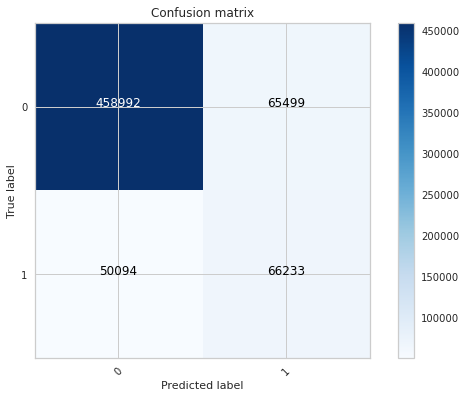

In [0]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_temp,
                      title='Confusion matrix')
plt.show()

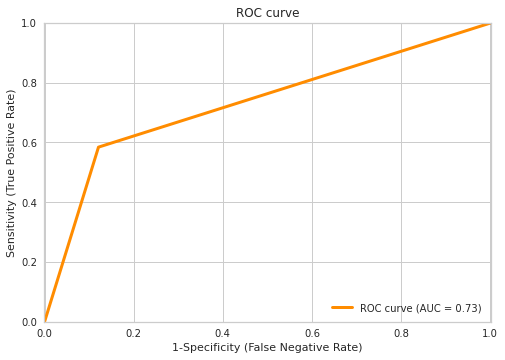

In [0]:
plot_roc(df_pandas.label, df_pandas.prediction)

In [0]:
# Load in the tables
test_df = spark.sql("select * from default.reviews_holdout")
test_df.show(5)
print((test_df.count(), len(test_df.columns)))

+--------+-------+--------+-----------+--------------+----------+----------------+--------------------+--------------------+--------------+
reviewID|overall|verified| reviewTime| reviewerID| asin| reviewerName| reviewText| summary|unixReviewTime|
+--------+-------+--------+-----------+--------------+----------+----------------+--------------------+--------------------+--------------+
67000000| 3.0| true|05 16, 2012|A3IXM075VM1P9T|B007JYB3O2| nachtik|I would say these...| average reading| 1337126400|
67000001| 5.0| true|12 25, 2012|A3LGZ7A3WSV3JJ| 985719745| MSP|WOW, DROPPIN DIME...|WOW.................| 1356393600|
67000002| 5.0| true|09 18, 2012|A3BF5G7CJNIAG0|B002KXH7PQ| C. S. DeMore|You'll love the p...|Another Buggy Bar...| 1347926400|
67000003| 5.0| false|07 27, 2015|A2W41RTHSHYC4Q|B011LXVWRO| Light|For the majority ...|This is a complet...| 1437955200|
67000004| 5.0| false|03 29, 2003| ACTBQZV1CJ9E8|9706061681|Richard Eastwood|MI MEJOR AMIGO..Q...|LE ACABA DE SUCED...| 1048896000|
+--------+-------+--------+-----------+--------------+----------+----------------+--------------------+--------------------+--------------+
only showing top 5 rows

(304984, 10)

In [0]:
degea=test_df.toPandas()

In [0]:
degea['word_count'] = degea["reviewText"].apply(lambda x: len(str(x).split(" ")))
degea['char_count'] = degea["reviewText"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
degea['sentence_count'] = degea["reviewText"].apply(lambda x: len(str(x).split(".")))
degea['avg_word_length'] = degea['char_count'] / degea['word_count']
degea['avg_sentence_lenght'] = degea['word_count'] / degea['sentence_count']
degea.head()

Out[41]:

reviewID 
 overall 
 verified 
 reviewTime 
 reviewerID 
 asin 
 reviewerName 
 reviewText 
 summary 
 unixReviewTime 
 word_count 
 char_count 
 sentence_count 
 avg_word_length 
 avg_sentence_lenght 
 
 
 
 
 0 
 67000000 
 3.0 
 True 
 05 16, 2012 
 A3IXM075VM1P9T 
 B007JYB3O2 
 nachtik 
 I would say these were 5 regular short stories... 
 average reading 
 1337126400 
 47 
 215 
 4 
 4.574468 
 11.750000 
 
 
 1 
 67000001 
 5.0 
 True 
 12 25, 2012 
 A3LGZ7A3WSV3JJ 
 985719745 
 MSP 
 WOW, DROPPIN DIMES 2 was SOOOOOOO GOOD, BETTER... 
 WOW................. 
 1356393600 
 132 
 598 
 21 
 4.530303 
 6.285714 
 
 
 2 
 67000002 
 5.0 
 True 
 09 18, 2012 
 A3BF5G7CJNIAG0 
 B002KXH7PQ 
 C. S. DeMore 
 You'll love the pattern for witches in this bo... 
 Another Buggy Barn Delight 
 1347926400 
 44 
 191 
 2 
 4.340909 
 22.000000 
 
 
 3 
 67000003 
 5.0 
 False 
 07 27, 2015 
 A2W41RTHSHYC4Q 
 B011LXVWRO 
 Light 
 For the majority of persons Algarve means beac... 
 This is a complete and practical guide book! 
 1437955200 
 160 
 738 
 10 
 4.612500 
 16.000000 
 
 
 4 
 67000004 
 5.0 
 False 
 03 29, 2003 
 ACTBQZV1CJ9E8 
 9706061681 
 Richard Eastwood 
 MI MEJOR AMIGO..QUE ESPANTO ! La chica adelgaz... 
 LE ACABA DE SUCEDER A LA HIJA MAYOR DE 
 1048896000 
 84 
 365 
 8 
 4.345238 
 10.500000

In [0]:
test_df=spark.createDataFrame(degea) 

In [0]:
#FE
import pyspark.sql.functions as f 
#Adding in length of reviewText & Summary as features

test_df= test_df.withColumn('rt_length', f.length('reviewText'))

#test_df = test_df.withColumn('rt_length_ind', f.when(f.col('rt_length') >= 900, 1).otherwise(0))

test_df.show(10)

+--------+-------+--------+-----------+--------------+----------+------------------+--------------------+--------------------+--------------+----------+----------+--------------+------------------+-------------------+---------+
reviewID|overall|verified| reviewTime| reviewerID| asin| reviewerName| reviewText| summary|unixReviewTime|word_count|char_count|sentence_count| avg_word_length|avg_sentence_lenght|rt_length|
+--------+-------+--------+-----------+--------------+----------+------------------+--------------------+--------------------+--------------+----------+----------+--------------+------------------+-------------------+---------+
67000000| 3.0| true|05 16, 2012|A3IXM075VM1P9T|B007JYB3O2| nachtik|I would say these...| average reading| 1337126400| 47| 215| 4| 4.574468085106383| 11.75| 261|
67000001| 5.0| true|12 25, 2012|A3LGZ7A3WSV3JJ| 985719745| MSP|WOW, DROPPIN DIME...|WOW.................| 1356393600| 132| 598| 21| 4.53030303030303| 6.285714285714286| 729|
67000002| 5.0| true|09 18, 2012|A3BF5G7CJNIAG0|B002KXH7PQ| C. S. DeMore|You'll love the p...|Another Buggy Bar...| 1347926400| 44| 191| 2| 4.340909090909091| 22.0| 234|
67000003| 5.0| false|07 27, 2015|A2W41RTHSHYC4Q|B011LXVWRO| Light|For the majority ...|This is a complet...| 1437955200| 160| 738| 10| 4.6125| 16.0| 897|
67000004| 5.0| false|03 29, 2003| ACTBQZV1CJ9E8|9706061681| Richard Eastwood|MI MEJOR AMIGO..Q...|LE ACABA DE SUCED...| 1048896000| 84| 365| 8| 4.345238095238095| 10.5| 448|
67000005| 5.0| true|04 22, 2014|A1RL0VMJVV8Q9N|B00BDAIDQ4| Barbara270|This is a short s...| Beautifully Written| 1398124800| 71| 318| 7| 4.47887323943662| 10.142857142857142| 388|
67000006| 5.0| false|08 18, 2015|A3GXIIUS36J8MC|1943892172| Jeri T. Ryan|Gamma Rift by Kal...|I kind of got an ...| 1439856000| 224| 834| 9|3.7232142857142856| 24.88888888888889| 1057|
67000007| 5.0| true|12 19, 2013|A24WXIBG9QK9ZQ|1493680544| LovesRomance|Curse of the Thun...|Wow! What an ente...| 1387411200| 127| 585| 12| 4.606299212598425| 10.583333333333334| 711|
67000008| 2.0| true| 11 3, 2008|A3DW43H13VGRMM|9058562271|MPC Direct Avoider|Just got the book...| It's OK| 1225670400| 75| 340| 6| 4.533333333333333| 12.5| 414|
67000009| 3.0| true| 06 7, 2014|A2WY3COAMVN3U4| 989203700| Miss piggy|I don't have chil...|tough to do caree...| 1402099200| 140| 548| 15| 3.914285714285714| 9.333333333333334| 687|
+--------+-------+--------+-----------+--------------+----------+------------------+--------------------+--------------------+--------------+----------+----------+--------------+------------------+-------------------+---------+
only showing top 10 rows

In [0]:
test_df_Transform = pipelineFit.transform(test_df)
#test_df_Transform= test_df_Transform.withColumn("features", explode(test_df_Transform.finished_use_embeddings))

In [0]:
print((test_df_Transform.count()))

--------------------------------------------------------------------------- 
 NameError Traceback (most recent call last)
 <command-709722948186975> in <module> 
 ----> 1 print ( ( test_df_Transform . count ( ) ) ) 

 NameError : name 'test_df_Transform' is not defined

In [0]:
#Making predictions

predictions = lrModel.transform(test_df_Transform)

In [0]:
#Converting into submission format

from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

probelement=udf(lambda v:float(v[1]),FloatType())
submission_data = predictions.select('reviewID', probelement('probability')).withColumnRenamed('<lambda>(probability)', 'label')

In [0]:
print((submission_data.count())) #THIS IS THE AFTER CONVERSION ROW NUMBER AFTER USING UNIVERSAL SENTENCE ENCODER

304927

In [0]:
display(submission_data.select('reviewID', 'label'))

reviewID label 67000000 0.4533023 67000001 0.5510593 67000002 0.33769932 67000003 0.7937758 67000004 0.3647614 67000005 0.4530673 67000006 0.6310723 67000007 0.5800661 67000008 0.42592797 67000009 0.58994836 67000010 0.26929474 67000011 0.82099885 67000012 0.27496818 67000013 0.48115924 67000014 0.2578376 67000015 0.2860853 67000016 0.6121508 67000017 0.27735913 67000018 0.3195819 67000019 0.36643714 67000020 0.2975342 67000021 0.24190913 67000022 0.4522601 67000023 0.24909523 67000024 0.40174744 67000025 0.30039832 67000026 0.43068784 67000027 0.4506755 67000028 0.4858752 67000029 0.29061642 67000030 0.23417366 67000031 0.38475263 67000032 0.42262262 67000033 0.5618855 67000034 0.6457361 67000035 0.36794576 67000036 0.7118549 67000037 0.26481858 67000038 0.3286425 67000039 0.6229758 67000040 0.50362957 67000041 0.76863074 67000042 0.28635654 67000043 0.3552673 67000044 0.6213784 67000045 0.9287309 67000046 0.33930546 67000047 0.68416667 67000048 0.3119365 67000049 0.35675266 67000050 0.32203615 67000051 0.9917635 67000052 0.5217644 67000053 0.33491296 67000054 0.26692146 67000055 0.24173407 67000056 0.5921659 67000057 0.9738151 67000058 0.37719128 67000059 0.63667643 67000060 0.85204625 67000061 0.6445389 67000062 0.49518764 67000063 0.29691803 67000064 0.38895845 67000065 0.32143754 67000066 0.5121293 67000067 0.3060555 67000068 0.2905661 67000069 0.37186956 67000070 0.31429747 67000071 0.24646947 67000072 0.39845413 67000073 0.24336775 67000074 0.75852865 67000075 0.29132298 67000076 0.3232617 67000077 0.5318794 67000078 0.28290048 67000079 0.30799067 67000080 0.33031228 67000081 0.33350614 67000082 0.27518424 67000083 0.55920196 67000084 0.24434379 67000085 0.89580905 67000086 0.34968743 67000087 0.3686812 67000088 0.5645801 67000089 0.3051532 67000090 0.48099664 67000091 0.26495925 67000092 0.28894383 67000093 0.71229124 67000094 0.6273419 67000095 0.43784377 67000096 0.50043684 67000097 0.9892049 67000098 0.4950079 67000099 0.50026846 67000100 0.9814321 67000101 0.905458 67000102 0.37064648 67000103 0.3767513 67000104 0.33968112 67000105 0.2574632 67000106 0.26879126 67000107 0.24775784 67000108 0.260068 67000109 0.56558466 67000110 0.7709564 67000111 0.2753693 67000112 0.26959753 67000113 0.23598704 67000114 0.328745 67000115 0.40986705 67000116 0.35530204 67000117 0.81901324 67000118 0.5558992 67000119 0.24365385 67000120 0.39407393 67000121 0.27319255 67000122 0.9286834 67000123 0.3486585 67000124 0.54732424 67000125 0.26209357 67000126 0.9560209 67000127 0.52390325 67000128 0.3499997 67000129 0.6872348 67000130 0.30632573 67000131 0.92961746 67000132 0.59904987 67000133 0.34450582 67000134 0.32473156 67000135 0.3860002 67000136 0.73593336 67000137 0.37728468 67000138 0.28379714 67000139 0.31307334 67000140 0.379904 67000141 0.9057924 67000142 0.4287685 67000143 0.49242273 67000144 0.5369568 67000145 0.49628776 67000146 0.78151816 67000147 0.47797474 67000148 0.9221243 67000149 0.6367654 67000150 0.46290177 67000151 0.817436 67000152 0.24655765 67000153 0.5189522 67000154 0.30642542 67000155 0.44811404 67000156 0.51269275 67000157 0.33826715 67000158 0.9947125 67000159 0.3225473 67000160 0.33560458 67000161 0.43059978 67000162 0.2736041 67000163 0.30016124 67000164 0.7184921 67000165 0.24638571 67000166 0.26388496 67000167 0.24611962 67000168 0.9214153 67000169 0.99736303 67000170 0.25649893 67000171 0.28406137 67000172 0.4059851 67000173 0.2632721 67000174 0.6686504 67000175 0.29472128 67000176 0.2788938 67000177 0.31143785 67000178 0.999996 67000179 0.9199556 67000180 0.29873222 67000181 0.34975597 67000182 0.41198632 67000183 0.69493675 67000184 0.24656586 67000185 0.36471254 67000186 0.28614932 67000187 0.2531705 67000188 0.7507492 67000189 0.2563088 67000190 0.5066393 67000191 0.49228683 67000192 0.5302258 67000193 0.30357686 67000194 0.7109762 67000195 0.34419644 67000196 0.38718504 67000197 0.32995024 67000198 0.56818473 67000199 0.44263995 67000200 0.9910739 67000201 0.96415776 67000202 0.43382233 67000203 0.2